In [1]:
import sys
import logging
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

pio.renderers.default = "svg"
%matplotlib inline

In [2]:
logging.info('Loading data sets')

df = pd.read_csv(r"..\data\data.csv")

logging.info('Loading data sets done.')

In [4]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [5]:
feat_lables =  ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean',
                'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se',
                'texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se',
                'symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst',
                'smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst',
                'fractal_dimension_worst']
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
X1 = df.copy()
X1.drop('diagnosis',axis=1,inplace=True)
scaler = StandardScaler()
X = scaler.fit_transform(X1)
y= df.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
clf = RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)
clf.fit(X_train,y_train)


#plot_feature_importance(clf.feature_importances_,X_train.columns,'RANDOM FOREST')

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [7]:
y_pred = clf.predict(X_test)
print ('Accuracy:',accuracy_score(y_test, y_pred))


Accuracy: 0.951048951048951


In [8]:
features = X1.drop(['id'],axis=1).columns.values

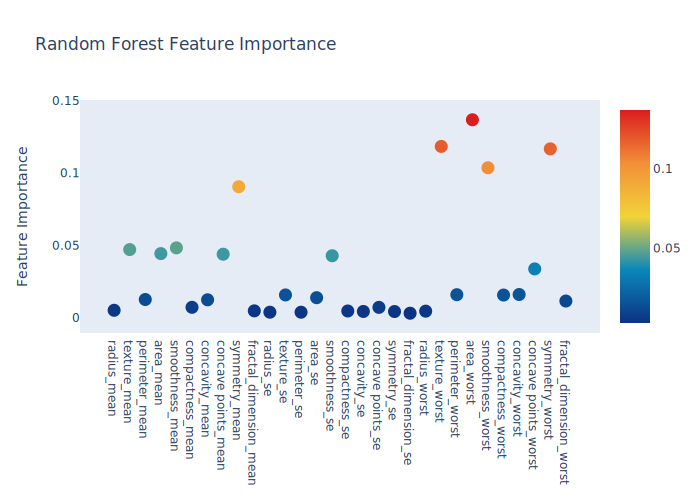

In [9]:
# Scatter plot 
trace = go.Scatter(
    y = clf.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = clf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

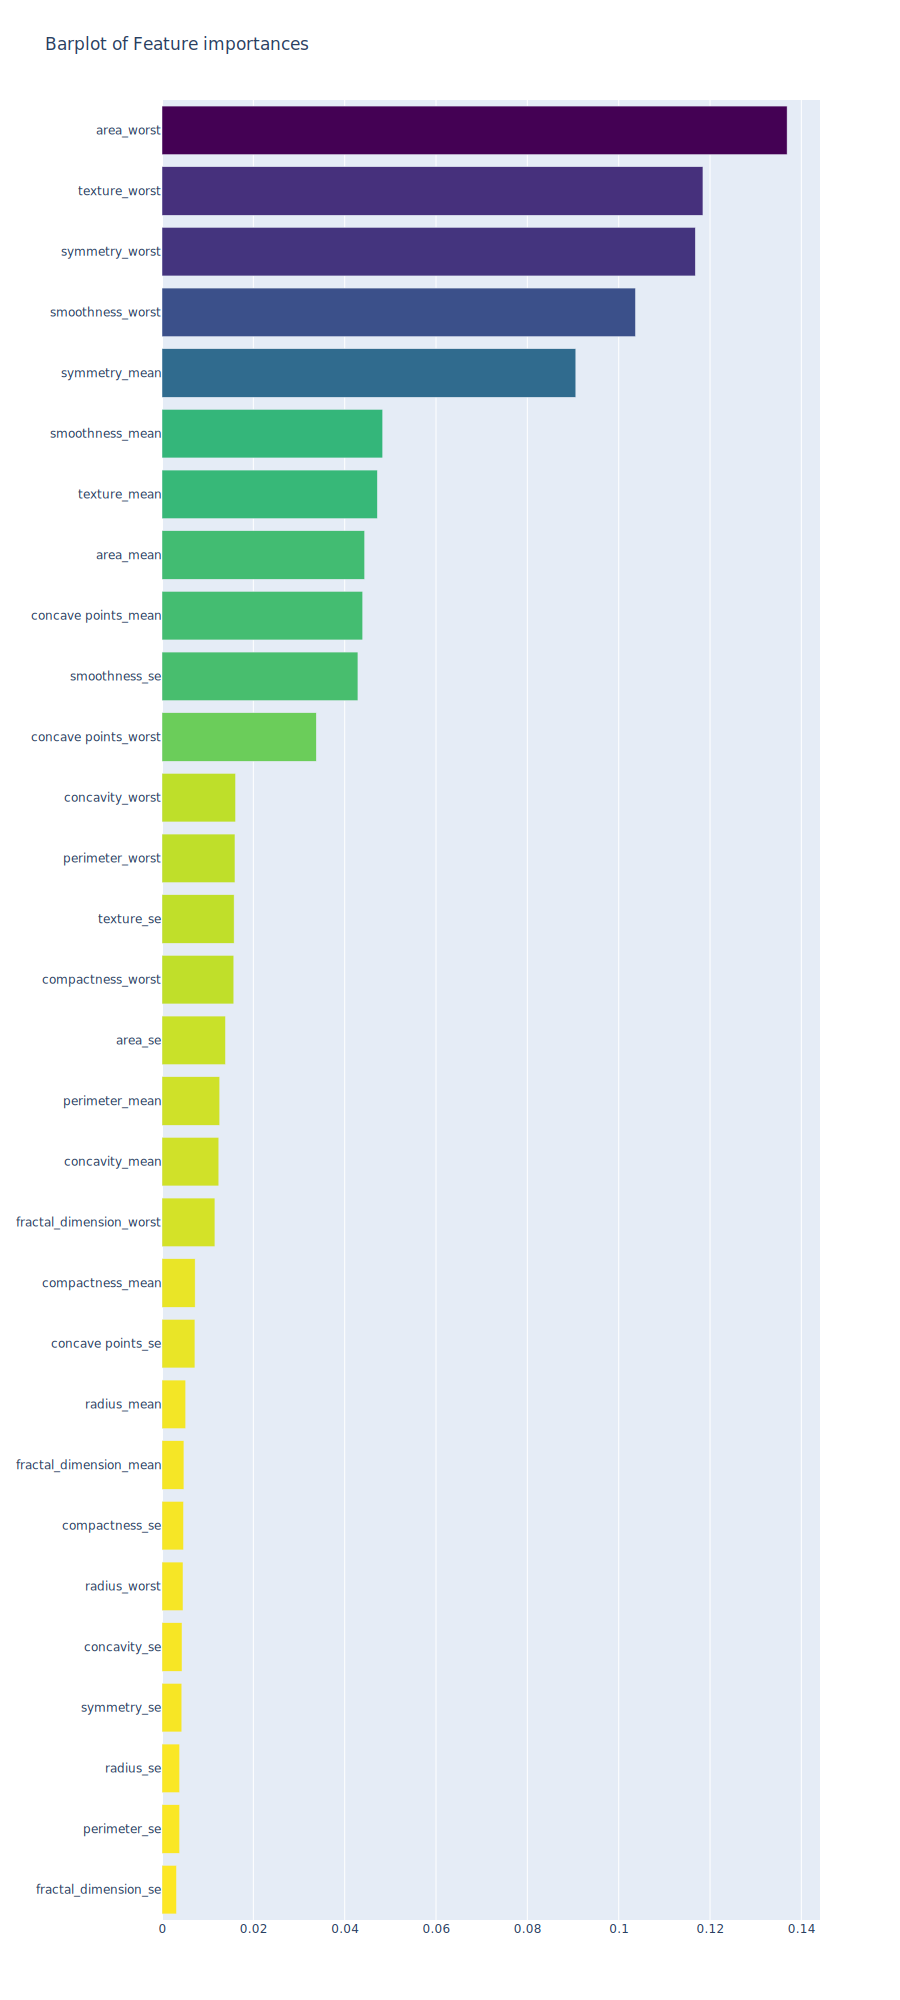

In [10]:
x, y = (list(x) for x in zip(*sorted(zip(clf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 900, height = 2000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')